In [1]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd

In [144]:
SR = 16000
F0_RANGE = (70, 350)
N_HARM = 7
SIGNAL_LENGTH = 2 * SR

F0 = np.linspace(F0_RANGE[0], F0_RANGE[1], SIGNAL_LENGTH)[..., np.newaxis]

In [145]:
x = np.arange(SIGNAL_LENGTH)[..., np.newaxis]
i = np.arange(1, N_HARM+1)[np.newaxis, ...]
# signal = np.zeros(len(x), dtype=np.float32)

signal = np.sin(2 * np.pi * x * (F0 @ i)/ SR)

In [146]:
signal.shape

(32000, 7)

In [147]:
signal = np.sum(signal, axis=1)

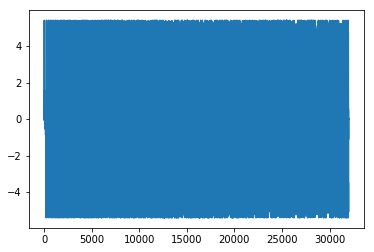

In [148]:
plt.plot(x, signal)

In [149]:
librosa.output.write_wav('generated.wav', signal, SR)
ipd.Audio(data=signal, rate=SR)

c:\soft\python36\lib\site-packages\librosa\filters.py:261: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '
c:\soft\python36\lib\site-packages\librosa\display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


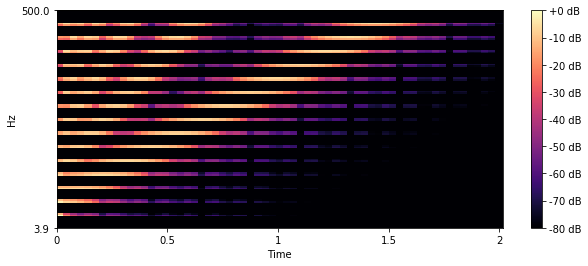

In [152]:
plt.figure(figsize=(10, 4))
S = librosa.feature.melspectrogram(y=signal, sr=SR, n_mels=128, n_fft=512, fmax=500)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=SR,fmax=500, x_axis='time')
plt.colorbar(format='%+2.0f dB')

In [2]:
SR = 16000

speech_file = '001.wav'
noice_file = 'толпа.mp3'

c:\soft\python36\lib\site-packages\librosa\display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


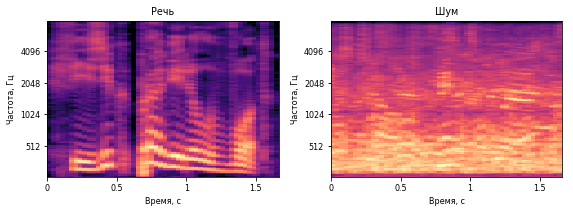

In [44]:
import matplotlib
matplotlib.rcParams['font.size'] = 8

y, _ = librosa.load(speech_file, sr=SR)
S = librosa.feature.melspectrogram(y=y, sr=SR, n_mels=128, fmax=8000)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.power_to_db(S[:, 0:60], ref=np.max), y_axis='mel', sr=SR,fmax=8000, x_axis='time')
# plt.colorbar(format='%+2.0f dB')
plt.title('Речь')
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')

# plt.savefig('speech.png')
plt.subplot(1, 2, 2)
y, _ = librosa.load(noice_file, sr=SR)
S = librosa.feature.melspectrogram(y=y, sr=SR, n_mels=128, fmax=8000)
i = 70
librosa.display.specshow(librosa.power_to_db(S[:, i:i+52], ref=np.max), y_axis='mel', sr=SR, fmax=8000, x_axis='time')
plt.title('Шум')
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
# plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
# plt.savefig('noice.png')
plt.savefig('result.png')

c:\soft\python36\lib\site-packages\librosa\display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


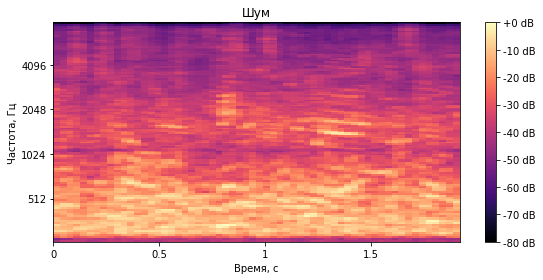

In [29]:
y, _ = librosa.load(noice_file, sr=SR)
S = librosa.feature.melspectrogram(y=y, sr=SR, n_mels=128, fmax=8000)
i = 70
plt.figure(figsize=(8, 4))
librosa.display.specshow(librosa.power_to_db(S[:, i:i+60], ref=np.max), y_axis='mel', sr=SR,fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Шум')
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
plt.tight_layout()
plt.savefig('noice.png')